# Machine Failure Classification using sensor data

By: Nathália Alvim

E-mail: natalvimdesouza@hotmail.com

Dataset is avaible on kaggle.

https://www.kaggle.com/datasets/mujtabamatin/dataset-for-machine-failure-detection

The dataset has 1000 samples and 6 variables.


The dataset consists of the following features:

- Temperature (°C): Continuous data representing the temperature at the machine's
critical points. Higher temperatures may indicate potential issues due to overheating.

- Vibration (Hz): Frequency of machine vibrations. Abnormal vibrations can signal mechanical misalignment, imbalance, or wear.

- Power Usage (kW): Power consumption levels of the machine. Spikes in power usage may indicate increased load or potential mechanical issues.

- Humidity (%): Environmental humidity around the machine. High humidity levels could affect machine performance and lead to failure over time.

- Machine Type: Categorical data indicating the type of machine (e.g., "Drill", "Lathe", "Mill"). Different machine types may have unique failure patterns.

Target Variable:

- Failure Risk: A binary label where 0 indicates normal operation, and 1 indicates that the machine is at risk of failure.

##Importing dataset

In [14]:
#Import packages for preprocessing
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [16]:
#Loading the dataset
file_path = '/workspaces/Machine-Learning/machine_failure_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Temperature,Vibration,Power_Usage,Humidity,Machine_Type,Failure_Risk
0,74.967142,56.996777,8.649643,20.460962,Mill,1
1,68.617357,54.623168,9.710963,25.698075,Lathe,0
2,76.476885,50.298152,8.415160,27.931972,Drill,1
3,85.230299,46.765316,9.384077,39.438438,Lathe,1
4,67.658466,53.491117,6.212771,32.782766,Drill,1


In [17]:
# General information
print(df.describe())
print(df.info())

       Temperature    Vibration  Power_Usage     Humidity  Failure_Risk
count  1000.000000  1000.000000  1000.000000  1000.000000   1000.000000
mean     70.193321    50.354181    10.011668    29.906404      0.300000
std       9.792159     4.987272     1.966909     5.135663      0.458487
min      37.587327    35.298057     3.960976    15.352757      0.000000
25%      63.524097    46.968792     8.704001    26.312898      0.000000
50%      70.253006    50.315386     9.999498    30.000923      0.000000
75%      76.479439    53.644411    11.321831    33.334727      1.000000
max     108.527315    65.965538    17.852475    46.215465      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   1000 non-null   float64
 1   Vibration     1000 non-null   float64
 2   Power_Usage   1000 non-null   float64
 3   Humidity      1000 non-null

## Class Balancing

In [18]:
# Class Balancing
# First i'll apply for the categorical variables and after i'll do with the binary variable

categorical = 'Machine_Type'

#Available categories

categories = df[categorical].unique()

#Counting
counting = df[categorical].value_counts()

print(categories)
print(counting)

['Mill' 'Lathe' 'Drill']
Machine_Type
Lathe    338
Drill    334
Mill     328
Name: count, dtype: int64


In [19]:
#Binary variable

binary = 'Failure_Risk'

#Available categories

categories = df[binary].unique() # 0 = Normal operation \\ 1 = Risk of failure

#Counting
counting = df[binary].value_counts()

print(categories)
print(counting)

[1 0]
Failure_Risk
0    700
1    300
Name: count, dtype: int64


In [20]:
# Machine Type and Failure Risk - number of occurrences
summary = df.groupby(['Machine_Type', 'Failure_Risk']).size().unstack(fill_value=0)

# Rename columns for clarity
summary.columns = ['Normal (0)', 'Failure (1)']

# Display the summary table
print(summary)

              Normal (0)  Failure (1)
Machine_Type                         
Drill                230          104
Lathe                233          105
Mill                 237           91


## Descriptive statistics

In [21]:
# Calculate mean, median, and mode for each numerical column
# Select only numerical columns (nc) and exclude the binary variable
# Select only numerical columns and exclude a specific one
nc = df.select_dtypes(include=['number']).drop(columns=['Failure_Risk'])

mean = nc.mean()
median = nc.median()
mode = nc.mode().iloc[0]  # Takes the first mode found for each column
std = nc.std()  # Standard deviation
cv = std / mean  # Coefficient of Variation


print("\nMean of each column:")
print(mean)

print("\nMedian of each column:")
print(median)

print("\nMode of each column:")
print(mode)

print("\nStandard Deviation of each column:")
print(std)

print("\nCoefficient of Variation (CV) of each column:")
print(cv)


Mean of each column:
Temperature    70.193321
Vibration      50.354181
Power_Usage    10.011668
Humidity       29.906404
dtype: float64

Median of each column:
Temperature    70.253006
Vibration      50.315386
Power_Usage     9.999498
Humidity       30.000923
dtype: float64

Mode of each column:
Temperature    37.587327
Vibration      35.298057
Power_Usage     3.960976
Humidity       15.352757
Name: 0, dtype: float64

Standard Deviation of each column:
Temperature    9.792159
Vibration      4.987272
Power_Usage    1.966909
Humidity       5.135663
dtype: float64

Coefficient of Variation (CV) of each column:
Temperature    0.139503
Vibration      0.099044
Power_Usage    0.196462
Humidity       0.171725
dtype: float64


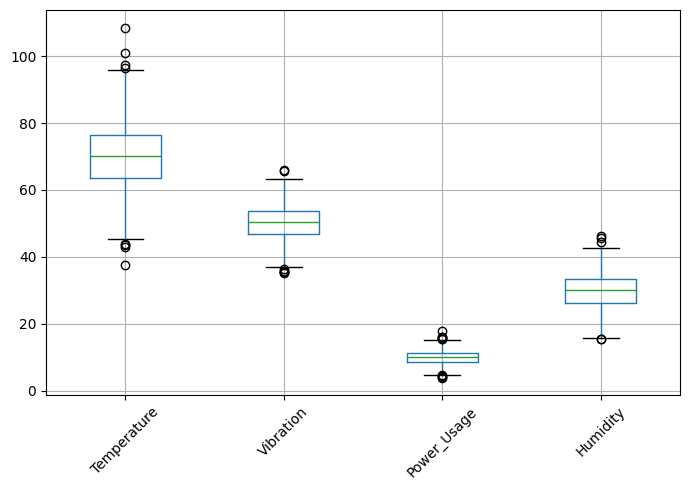

In [22]:
# Boxpot
# Generate boxplot to visualize distribution and possible outliers
plt.figure(figsize=(7, 5))
nc.boxplot()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

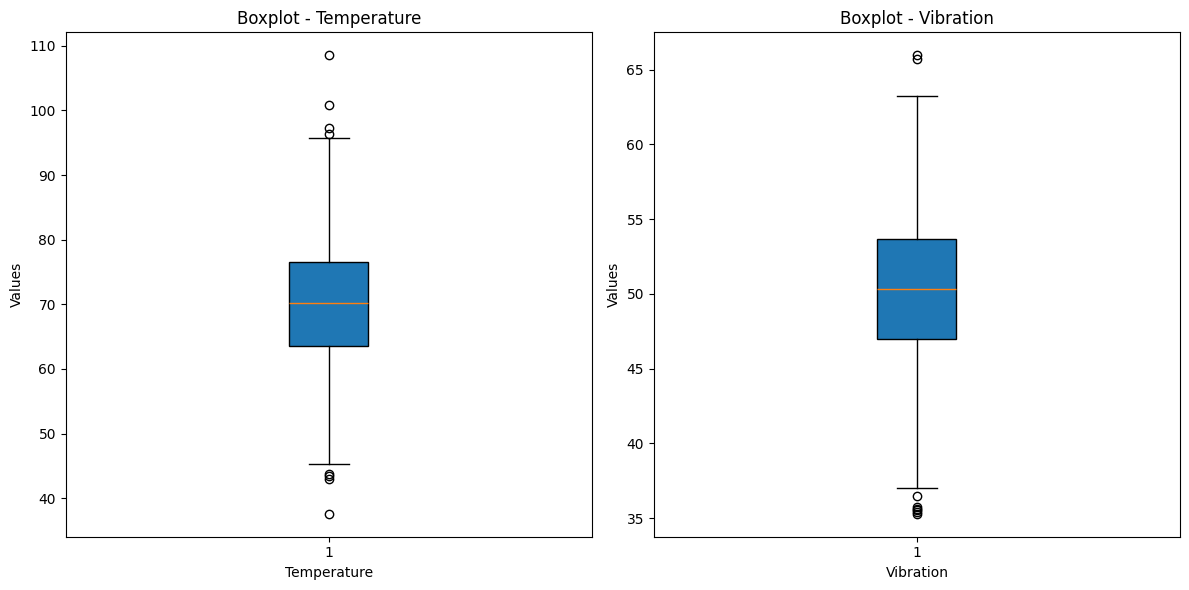

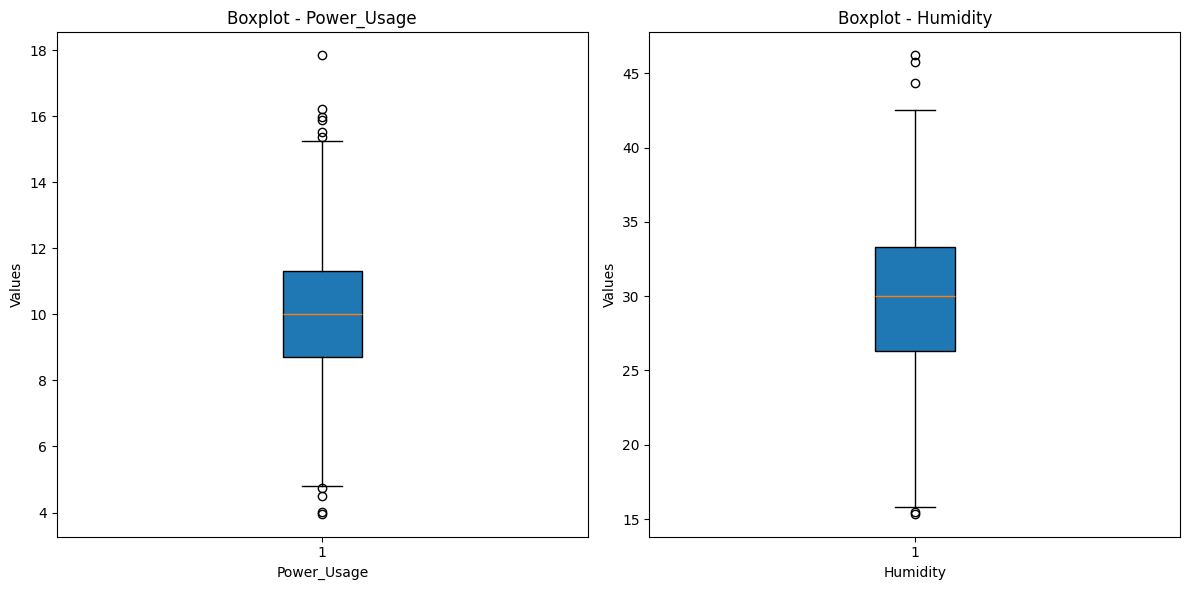

In [23]:
# Generate paired boxplots to save space and for better visualization
columns = nc.columns
num_columns = len(columns)

# Iterate over the columns in pairs
for i in range(0, num_columns, 2):
    # Set up the subplot for 2 side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # First boxplot
    axes[0].boxplot(nc[columns[i]].dropna(), vert=True, patch_artist=True)
    axes[0].set_title(f"Boxplot - {columns[i]}")
    axes[0].set_xlabel(columns[i])
    axes[0].set_ylabel("Values")

    # Second boxplot (if it exists)
    if i + 1 < num_columns:
        axes[1].boxplot(nc[columns[i + 1]].dropna(), vert=True, patch_artist=True)
        axes[1].set_title(f"Boxplot - {columns[i + 1]}")
        axes[1].set_xlabel(columns[i + 1])
        axes[1].set_ylabel("Values")
    else:
        # Remove the second subplot if there's no second column
        fig.delaxes(axes[1])

    # Adjust layout
    plt.tight_layout()
    plt.show()

## Normality of the dataset

- Shapiro-Wilk

- D’Agostino-Pearson

- Anderson-Darling

In [24]:
from scipy.stats import shapiro, normaltest, anderson

In [25]:
def normality_tests_summary(dataframe):
    numeric_cols = dataframe.select_dtypes(include=['number'])
    results = []

    for col in numeric_cols.columns:
        col_data = numeric_cols[col].dropna()

        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(col_data)
        shapiro_result = "Normal" if shapiro_p > 0.05 else "Not normal"

        # D’Agostino and Pearson Test
        dagostino_stat, dagostino_p = normaltest(col_data)
        dagostino_result = "Normal" if dagostino_p > 0.05 else "Not normal"

        # Anderson-Darling Test
        anderson_result_obj = anderson(col_data)
        ad_stat = anderson_result_obj.statistic
        # Compare with 5% significance level
        ad_result = "Normal" if ad_stat < anderson_result_obj.critical_values[2] else "Not normal"

        results.append({
            "Column": col,
            "Shapiro-Wilk (p)": round(shapiro_p, 4),
            "Shapiro Result": shapiro_result,
            "D’Agostino (p)": round(dagostino_p, 4),
            "D’Agostino Result": dagostino_result,
            "Anderson-Darling (stat)": round(ad_stat, 4),
            "Anderson Result (5%)": ad_result
        })

    return pd.DataFrame(results)


In [26]:
summary_df = normality_tests_summary(nc)
print(summary_df)

        Column  Shapiro-Wilk (p) Shapiro Result  D’Agostino (p)  \
0  Temperature            0.6273         Normal          0.2759   
1    Vibration            0.7312         Normal          0.7373   
2  Power_Usage            0.7178         Normal          0.3927   
3     Humidity            0.4838         Normal          0.2717   

  D’Agostino Result  Anderson-Darling (stat) Anderson Result (5%)  
0            Normal                   0.3475               Normal  
1            Normal                   0.1739               Normal  
2            Normal                   0.2119               Normal  
3            Normal                   0.3145               Normal  


## Pearson correlation map




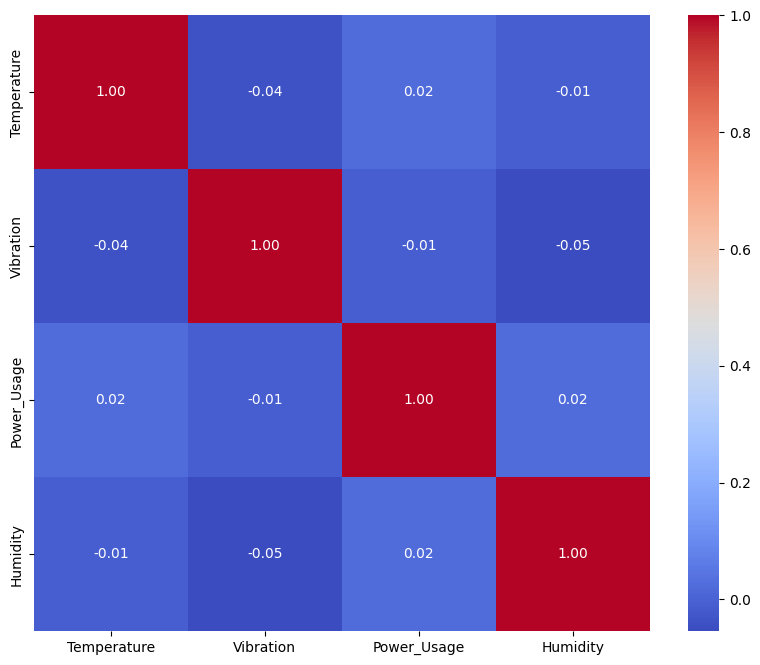

In [28]:
# Pearson Correlation Map
# Calculate the correlation matrix (Pearson coefficient)
pearson_correlation = nc.corr(method='pearson')

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_correlation, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)

plt.show()

### Conclusion:

The data set follows a normal distribution by tests performed such as Shapiro Wilk.
A graph was generated in order to define the linearity of the system, thus concluding that the system is non-linear.
Finally, the Pearson correlation map was created to see the relationship between the variables.

In summary:

-> Non-linear

-> Normal Distribution

## Train and Test

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
# Separate the dataset
drill_df = df[df['Machine_Type'] == 'Drill'].copy()
lathe_df = df[df['Machine_Type'] == 'Lathe'].copy()
mill_df = df[df['Machine_Type'] == 'Mill'].copy()

In [32]:
# Separate features (X) and target (y)
X = drill_df.drop(columns=['Failure_Risk', 'Machine_Type'])
y = drill_df['Failure_Risk']

In [33]:
#80 training and 20 for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

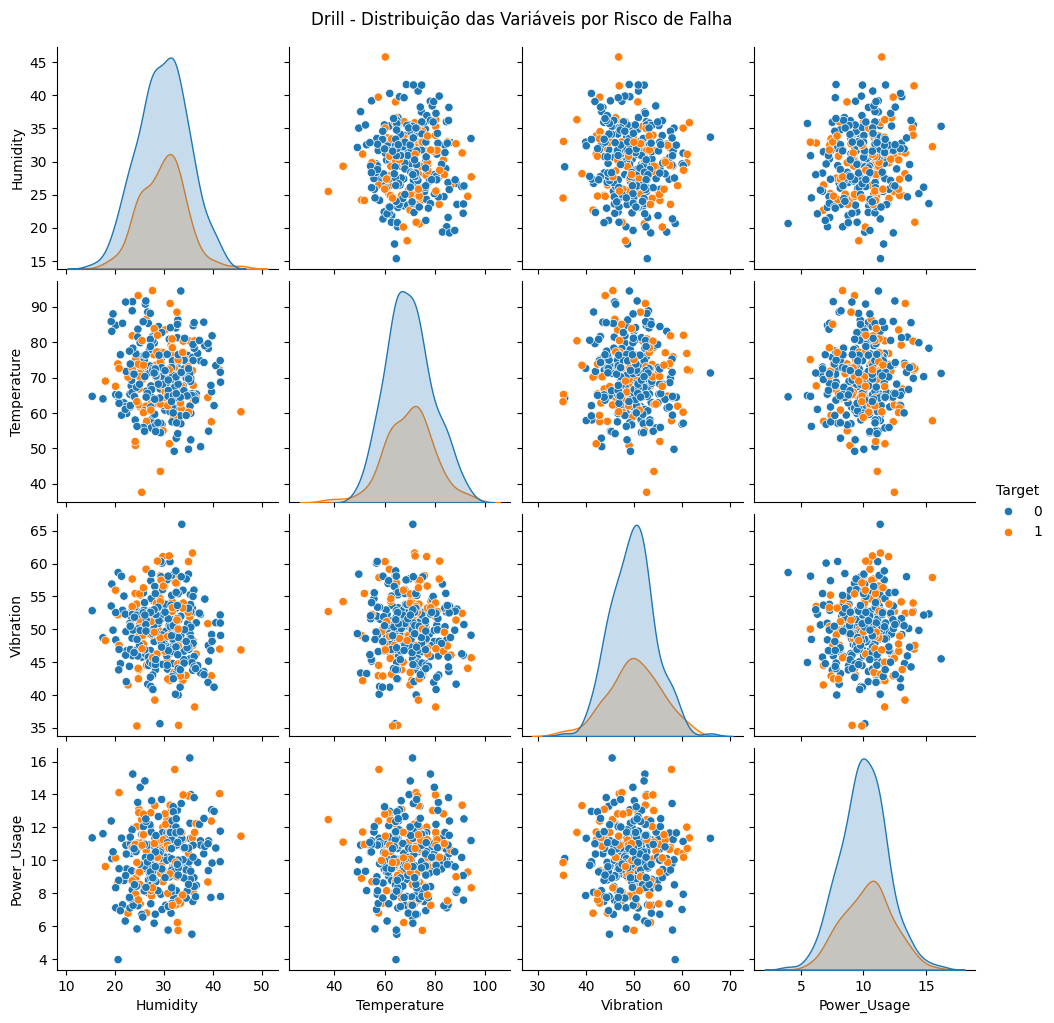

In [34]:
# Visually see how classes are distributed across variable combinations for Machine Type - Drill
X = drill_df.drop(columns=['Failure_Risk', 'Machine_Type'])
y = drill_df['Failure_Risk']

data_plot = pd.DataFrame(X, columns=['Humidity', 'Temperature', 'Vibration', 'Power_Usage'])
data_plot['Target'] = y

# Pairplot
sns.pairplot(data_plot, hue='Target')
plt.suptitle('Drill - Distribuição das Variáveis por Risco de Falha', y=1.02)
plt.show()

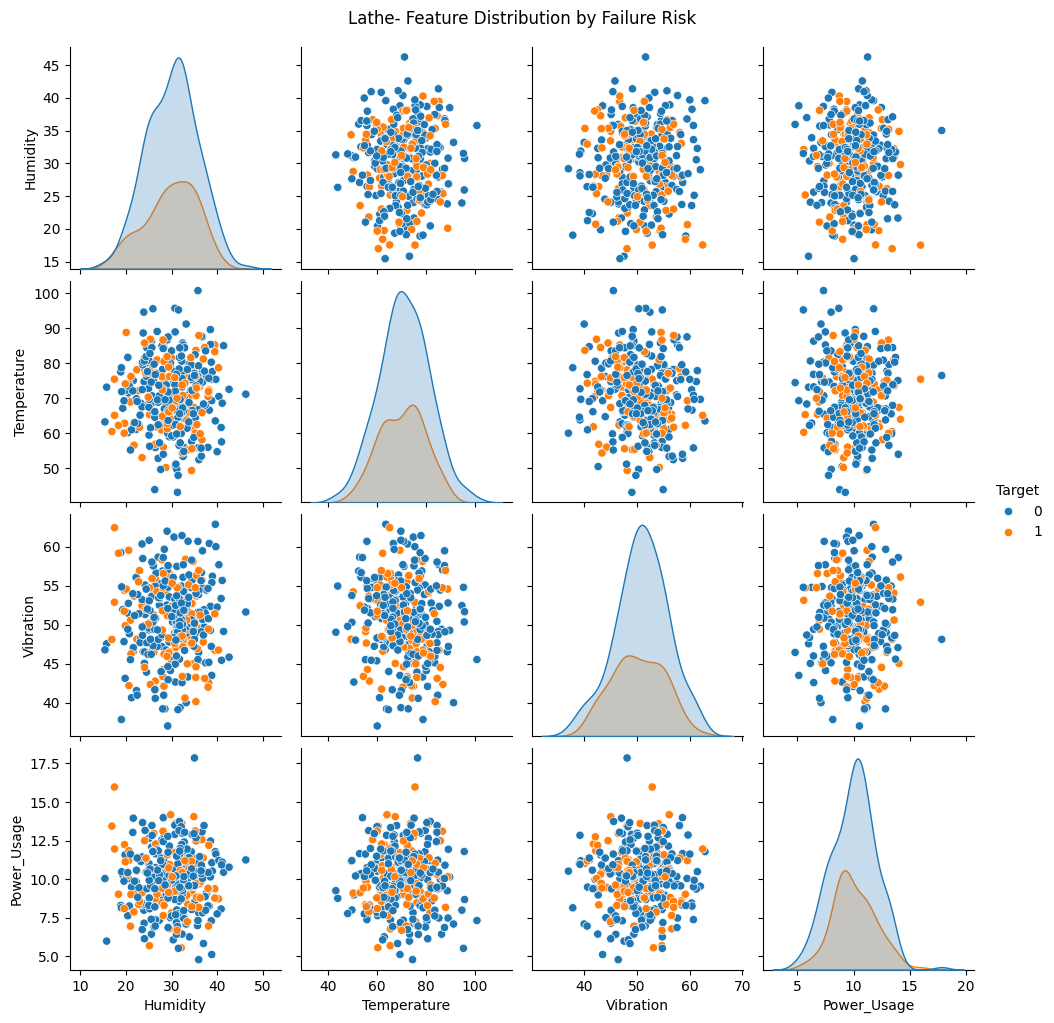

In [35]:
# Visually see how classes are distributed across variable combinations for Machine Type - Lathe
X = lathe_df.drop(columns=['Failure_Risk', 'Machine_Type'])
y = lathe_df['Failure_Risk']

data_plot = pd.DataFrame(X, columns=['Humidity', 'Temperature', 'Vibration', 'Power_Usage'])
data_plot['Target'] = y

# Pairplot
sns.pairplot(data_plot, hue='Target')
plt.suptitle('Lathe- Feature Distribution by Failure Risk', y=1.02)
plt.show()

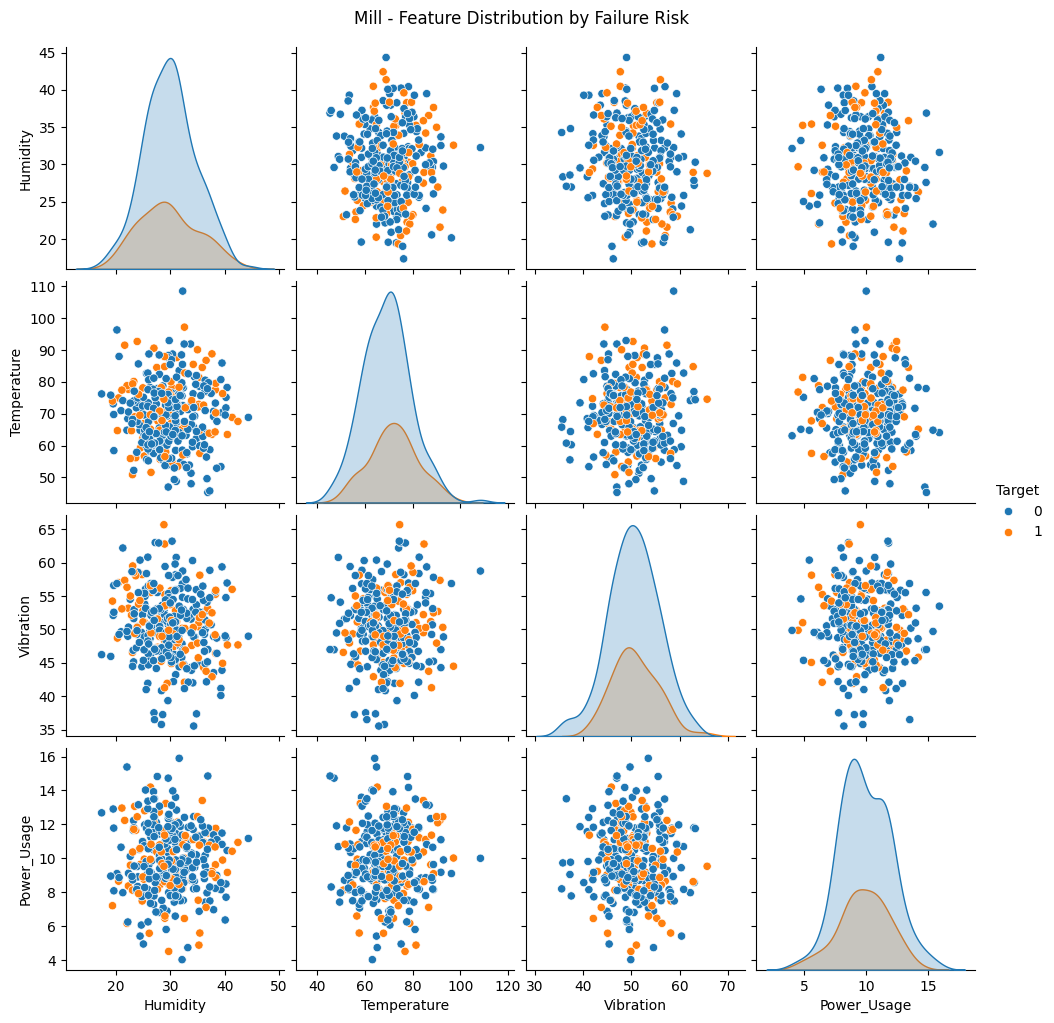

In [36]:
# Visually see how classes are distributed across variable combinations for Machine Type - Mill
X = mill_df.drop(columns=['Failure_Risk', 'Machine_Type'])
y = mill_df['Failure_Risk']
data_plot = pd.DataFrame(X, columns=['Humidity', 'Temperature', 'Vibration', 'Power_Usage'])
data_plot['Target'] = y

# Pairplot
sns.pairplot(data_plot, hue='Target')
plt.suptitle('Mill - Feature Distribution by Failure Risk', y=1.02)
plt.show()

## Adding new data to improve class balance

I'll use Autoencode to add some data

In [37]:
#Import packages tensor flow
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


2025-08-21 18:36:29.492532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-21 18:36:32.218978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-21 18:36:38.827646: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [38]:
# Select only data with failures
df_failures = df[df["Failure_Risk"] == 1]

# Only numerical columns
features = ["Humidity", "Temperature", "Vibration", "Power_Usage"]
X_failure = df_failures[features].values

# Normalize the data
scaler = MinMaxScaler()
X_failure_scaled = scaler.fit_transform(X_failure)

# Latent space dimension
latent_dim = 2
input_dim = X_failure_scaled.shape[1]

In [39]:
def build_vae(input_dim, latent_dim=2):
# Encoder
    inputs = layers.Input(shape=(input_dim,))
    h = layers.Dense(16, activation='relu')(inputs)
    z_mean = layers.Dense(latent_dim, name='z_mean')(h)
    z_log_var = layers.Dense(latent_dim, name='z_log_var')(h)

    # Sampling layer
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    # Decoder
    decoder_h = layers.Dense(16, activation='relu')
    decoder_output = layers.Dense(input_dim, activation='sigmoid')
    h_decoded = decoder_h(z)
    outputs = decoder_output(h_decoded)

    encoder = models.Model(inputs, [z_mean, z_log_var, z], name='encoder')
    decoder_input = layers.Input(shape=(latent_dim,))
    decoder_model = models.Model(decoder_input, decoder_output(decoder_h(decoder_input)), name='decoder')

    # VAE
    class VAE(models.Model):
        def __init__(self, encoder, decoder, **kwargs):
            super(VAE, self).__init__(**kwargs)
            self.encoder = encoder
            self.decoder = decoder

        def compile(self, optimizer):
            super(VAE, self).compile()
            self.optimizer = optimizer
            self.total_loss_tracker = tf.keras.metrics.Mean(name="loss")
            self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
            self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

        @property
        def metrics(self):
            return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]

        def train_step(self, data):
            if isinstance(data, tuple):
                data = data[0]
            with tf.GradientTape() as tape:
                z_mean, z_log_var, z = self.encoder(data)
                reconstruction = self.decoder(z)
                reconstruction_loss = tf.reduce_mean(tf.reduce_sum(tf.square(data - reconstruction), axis=1))
                kl_loss = -0.5 * tf.reduce_mean(tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1))
                total_loss = reconstruction_loss + kl_loss

            grads = tape.gradient(total_loss, self.trainable_weights)
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

            self.total_loss_tracker.update_state(total_loss)
            self.reconstruction_loss_tracker.update_state(reconstruction_loss)
            self.kl_loss_tracker.update_state(kl_loss)
            return {
                "loss": self.total_loss_tracker.result(),
                "reconstruction_loss": self.reconstruction_loss_tracker.result(),
                "kl_loss": self.kl_loss_tracker.result(),
            }

    return VAE(encoder, decoder_model), encoder, decoder_model

In [40]:
def generate_synthetic_failures(df_machine, features, samples_to_generate=300):
    df_failures = df_machine[df_machine["Failure_Risk"] == 1].copy()
    scaler = MinMaxScaler()
    X_failure_scaled = scaler.fit_transform(df_failures[features])

    vae, encoder, decoder = build_vae(input_dim=X_failure_scaled.shape[1])
    vae.compile(optimizer=tf.keras.optimizers.Adam())
    vae.fit(X_failure_scaled, epochs=100, batch_size=32, verbose=0)

    z_samples = np.random.normal(size=(samples_to_generate, 2))
    generated_data = decoder.predict(z_samples)
    generated_data = scaler.inverse_transform(generated_data)

    df_synthetic = pd.DataFrame(generated_data, columns=features)
    df_synthetic["Failure_Risk"] = 1
    df_synthetic["Machine_Type"] = df_machine["Machine_Type"].iloc[0]  # preserve machine label

    return df_synthetic

In [41]:
# --- APPLY TO ALL MACHINE TYPES ---
features = ["Humidity", "Temperature", "Vibration", "Power_Usage"]

df_drill = df[df["Machine_Type"] == "Drill"].copy()
df_lathe = df[df["Machine_Type"] == "Lathe"].copy()
df_mill  = df[df["Machine_Type"] == "Mill"].copy()

df_synth_drill = generate_synthetic_failures(df_drill, features)
df_synth_lathe = generate_synthetic_failures(df_lathe, features)
df_synth_mill  = generate_synthetic_failures(df_mill, features)


2025-08-21 18:36:39.649453: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


## Create a new dataset

Generate synthetic data + the old dataset

In [42]:
# Combine with original data
df_drill_aug = pd.concat([df_drill, df_synth_drill], ignore_index=True)
df_lathe_aug = pd.concat([df_lathe, df_synth_lathe], ignore_index=True)
df_mill_aug  = pd.concat([df_mill, df_synth_mill], ignore_index=True)

## Train and Test Split

In [43]:
# From here, do the usual train-test split for Drill:
X_drill = df_drill_aug[features]
y_drill = df_drill_aug["Failure_Risk"]
X_train_drill, X_test_drill, y_train_drill, y_test_drill = train_test_split(X_drill, y_drill, test_size=0.3, stratify=y_drill, random_state=42)

In [44]:
# From here, do the usual train-test split for Lathe:
X_lathe = df_lathe_aug[features]
y_lathe = df_lathe_aug["Failure_Risk"]
X_train_lathe, X_test_lathe, y_train_lathe, y_test_lathe = train_test_split(X_lathe, y_lathe, test_size=0.3, stratify=y_lathe, random_state=42)

In [45]:
# From here, do the usual train-test split for Mill:
X_mill = df_mill_aug[features]
y_mill = df_mill_aug["Failure_Risk"]
X_train_mill, X_test_mill, y_train_mill, y_test_mill = train_test_split(X_mill, y_mill, test_size=0.3, stratify=y_mill, random_state=42)

In [46]:
# Scale features again
# --- Drill ---
scaler_drill = MinMaxScaler()
X_train_drill_scaled = scaler_drill.fit_transform(X_train_drill)
X_test_drill_scaled = scaler_drill.transform(X_test_drill)

# --- Lathe ---
scaler_lathe = MinMaxScaler()
X_train_lathe_scaled = scaler_lathe.fit_transform(X_train_lathe)
X_test_lathe_scaled = scaler_lathe.transform(X_test_lathe)

# --- Mill ---
scaler_mill = MinMaxScaler()
X_train_mill_scaled = scaler_mill.fit_transform(X_train_mill)
X_test_mill_scaled = scaler_mill.transform(X_test_mill)

## Models

In [47]:
#Installing Lazy Predict
!pip install lazypredict


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [48]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, cross_validate
from lazypredict.Supervised import LazyClassifier

In [49]:
# Run LazyClassifier for all machine types:

# --- Drill ---
clf_drill = LazyClassifier(verbose=0, ignore_warnings=True, predictions=False, custom_metric=None)
models_drill, predictions_drill = clf_drill.fit(X_train_drill_scaled, X_test_drill_scaled, y_train_drill, y_test_drill)
print("Drill Results:\n", models_drill)

# --- Lathe ---
clf_lathe = LazyClassifier(verbose=0, ignore_warnings=True)
models_lathe, predictions_lathe = clf_lathe.fit(X_train_lathe_scaled, X_test_lathe_scaled, y_train_lathe, y_test_lathe)
print("\nLathe Results:\n", models_lathe)

# --- Mill ---
clf_mill = LazyClassifier(verbose=0, ignore_warnings=True)
models_mill, predictions_mill = clf_mill.fit(X_train_mill_scaled, X_test_mill_scaled, y_train_mill, y_test_mill)
print("\nMill Results:\n", models_mill)



  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 282, number of negative: 161
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 443, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636569 -> initscore=0.560503
[LightGBM] [Info] Start training from score 0.560503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 283, number of negative: 163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.634529 -> initscore=0.551697
[LightGBM] [Info] Start training from score 0.551697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 273, number of negative: 166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 587
[LightGBM] [Info] Number of data points in the train set: 439, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.621868 -> initscore=0.497484
[LightGBM] [Info] Start training from score 0.497484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [50]:
# Default Lazy Classifier
for model_name, model_object in clf_drill.models.items():
    print(f"\nModel Drill: {model_name}")
    print(model_object.get_params())

for model_name, model_object in clf_lathe.models.items():
    print(f"\nModel Lathe: {model_name}")
    print(model_object.get_params())

for model_name, model_object in clf_mill.models.items():
    print(f"\nModel Mill: {model_name}")
    print(model_object.get_params())


Model Drill: AdaBoostClassifier
{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index([0, 1, 2, 3], dtype='int64')),
                                ('categorical_low',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index([], dtype='int64')),
                                ('categorical_high',
          

{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index([0, 1, 2, 3], dtype='int64')),
                                ('categorical_low',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index([], dtype='int64')),
                                ('categorical_high',
                                 Pipeline(s

###  Resultados para Drill

| Modelo                | Acc  | Bal. Acc | ROC AUC | F1   |
|-----------------------|------|----------|---------|------|
| NuSVC                 | 0.84 | 0.86     | 0.86    | 0.85 |
| SVC                   | 0.83 | 0.84     | 0.84    | 0.83 |
| BaggingClassifier     | 0.83 | 0.84     | 0.84    | 0.83 |
| KNeighborsClassifier  | 0.83 | 0.83     | 0.83    | 0.83 |
| ExtraTreesClassifier  | 0.83 | 0.82     | 0.82    | 0.83 |

---

###  Resultados para Lathe

| Modelo                | Acc  | Bal. Acc | ROC AUC | F1   |
|-----------------------|------|----------|---------|------|
| NuSVC                 | 0.87 | 0.88     | 0.88    | 0.87 |
| SVC                   | 0.86 | 0.87     | 0.87    | 0.87 |
| BaggingClassifier     | 0.85 | 0.84     | 0.84    | 0.85 |
| XGBClassifier         | 0.85 | 0.84     | 0.84    | 0.85 |
| RandomForestClassifier| 0.84 | 0.84     | 0.84    | 0.84 |

---

###  Resultados para Mill

| Modelo                | Acc  | Bal. Acc | ROC AUC | F1   |
|-----------------------|------|----------|---------|------|
| ExtraTreesClassifier  | 0.87 | 0.87     | 0.87    | 0.87 |
| BaggingClassifier     | 0.87 | 0.87     | 0.87    | 0.87 |
| SVC                   | 0.86 | 0.86     | 0.86    | 0.86 |
| NuSVC                 | 0.84 | 0.83     | 0.83    | 0.84 |
| RandomForestClassifier| 0.84 | 0.83     | 0.83    | 0.84 |


## Testing for all machines

Models:

- SVC ( Drill and Lathe)

- Extra Trees Classifier (Mill)

Using scores like:

- accuracy
- f1
- recall
- precision
- roc_AUC
- Cross Validation

In [51]:
!pip install imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score,roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [52]:
# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
# --- Drill Dataset ---
X_drill = df_drill_aug.drop(['Failure_Risk', 'Machine_Type'], axis=1)
y_drill = df_drill_aug['Failure_Risk']

# LazyClassifier with SVC
pipeline_drill = ImbPipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(
        kernel='rbf',
        gamma='scale',
        probability=True,
        random_state=42
    ))
])

# Cross-validation
results_drill = cross_validate(
    pipeline_drill,
    X_drill,
    y_drill,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    return_train_score=False,
    error_score='raise'
)

# Mean Results
print("\n--- Drill (SVC) ---")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(results_drill['test_' + metric]):.4f}")


--- Drill (SVC) ---
Accuracy: 0.8043
F1: 0.8327
Recall: 0.7697
Precision: 0.9089
Roc_auc: 0.8175


In [54]:
# --- Lathe Dataset ---
X_lathe = df_lathe_aug.drop(['Failure_Risk', 'Machine_Type'], axis=1)
y_lathe = df_lathe_aug['Failure_Risk']

# LazyClassifier with SVC
pipeline_lathe = ImbPipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(
        kernel='rbf',
        gamma='scale',
        probability=True,
        random_state=42
    ))
])

# Cross-validation
results_lathe = cross_validate(
    pipeline_lathe,
    X_lathe,
    y_lathe,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    return_train_score=False,
    error_score='raise'
)

# Mean Results
print("\n--- Lathe (SVC) ---")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(results_lathe['test_' + metric]):.4f}")



--- Lathe (SVC) ---
Accuracy: 0.8229
F1: 0.8453
Recall: 0.7654
Precision: 0.9470
Roc_auc: 0.8439


In [55]:
# --- Mill Dataset ---
X_mill = df_mill_aug.drop(['Failure_Risk', 'Machine_Type'], axis=1)
y_mill = df_mill_aug['Failure_Risk']

# LazyClassifier com ExtraTreesClassifier
pipeline_mill = ImbPipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', ExtraTreesClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Cross-validation
results_mill = cross_validate(
    pipeline_mill,
    X_mill,
    y_mill,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    return_train_score=False,
    error_score='raise'
)

# Mean Results
print("\n--- Mill (ExtraTreesClassifier) ---")
for metric in scoring:
    print(f"{metric.capitalize()}: {np.mean(results_mill['test_' + metric]):.4f}")



--- Mill (ExtraTreesClassifier) ---
Accuracy: 0.8376
F1: 0.8570
Recall: 0.7853
Precision: 0.9465
Roc_auc: 0.8548


| Modelo           | Accuracy | F1 Score | Recall | Precision | ROC AUC |
|------------------|----------|----------|--------|-----------|---------|
| Drill (SVC)    | 0.8122   | 0.8379   | 0.7697 | 0.9227    | 0.8392  |
| Lathe (SVC)    | 0.8182   | 0.8423   | 0.7679 | 0.9365    | 0.8408  |
| Mill (ExtraTrees)| 0.8296   | 0.8509   | 0.7827 | 0.9547    | 0.8451  |


In [56]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict

In [57]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Normal', 'Failure'], yticklabels=['Normal', 'Failure'])
    plt.title(title)
    plt.xlabel('Prediction')
    plt.ylabel('True Label')
    plt.show()

# Function to plot ROC curve and AUC
def plot_roc_curve(y_true, y_prob, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Txa de Verdadeiros Positivos')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

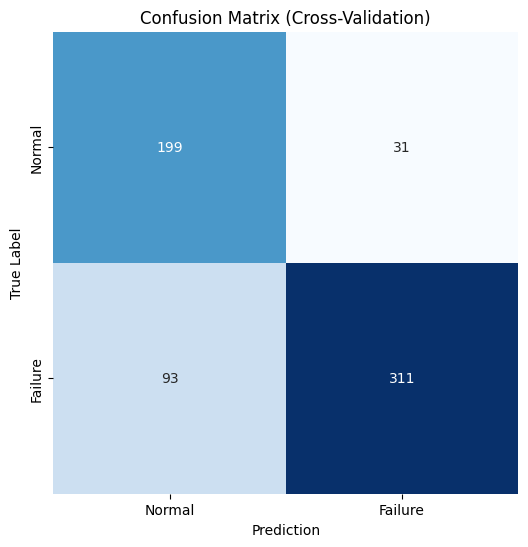

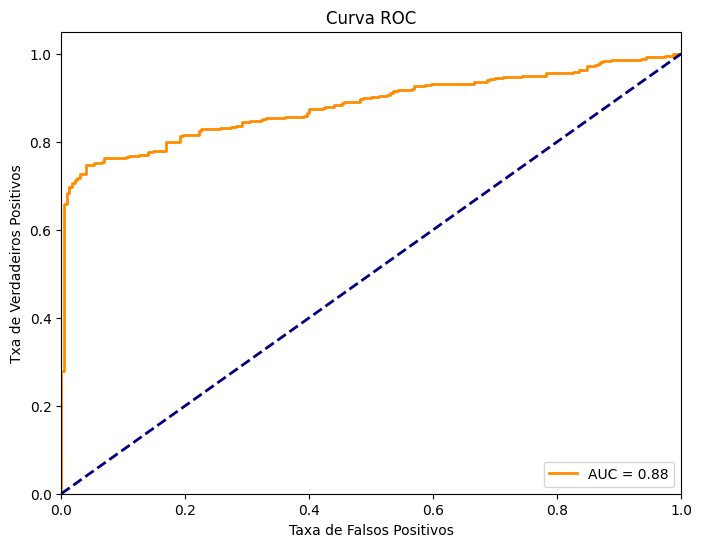

In [58]:
# --- Drill (SVC) ---
y_pred_cv = cross_val_predict(pipeline_drill, X_drill, y_drill, cv=cv, method='predict')
y_prob_cv = cross_val_predict(pipeline_drill, X_drill, y_drill, cv=cv, method='predict_proba')[:, 1]

# Confusion Matrix and ROC Curve for Drill
plot_confusion_matrix(y_drill, y_pred_cv, title="Confusion Matrix (Cross-Validation)")
plot_roc_curve(y_drill, y_prob_cv, title="Curva ROC")

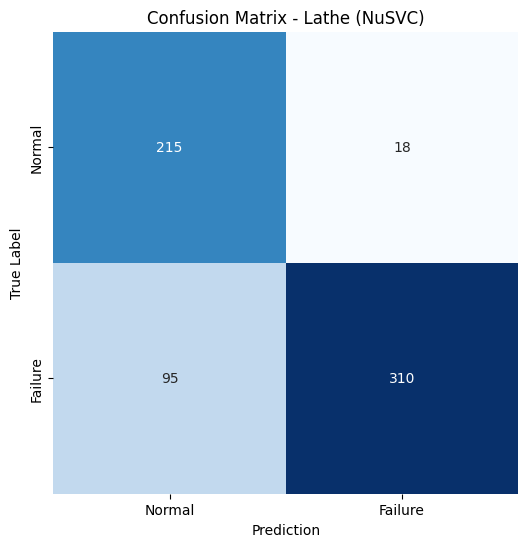

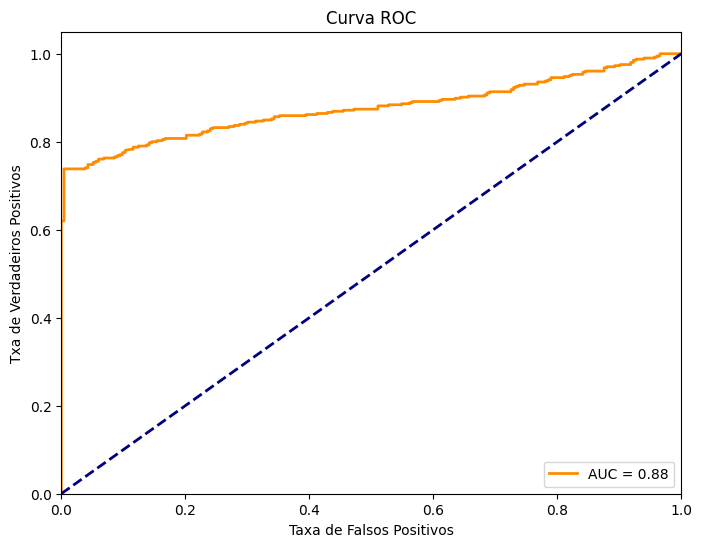

In [59]:
# --- Lathe (NuSVC) ---
y_lathe_pred = cross_val_predict(pipeline_lathe, X_lathe, y_lathe, cv=cv, method='predict')
y_lathe_prob = cross_val_predict(pipeline_lathe, X_lathe, y_lathe, cv=cv, method='predict_proba')[:, 1]

# Confusion Matrix and ROC Curve for Lathe
plot_confusion_matrix(y_lathe, y_lathe_pred, title="Confusion Matrix - Lathe (NuSVC)")
plot_roc_curve(y_lathe, y_lathe_prob, title="Curva ROC")

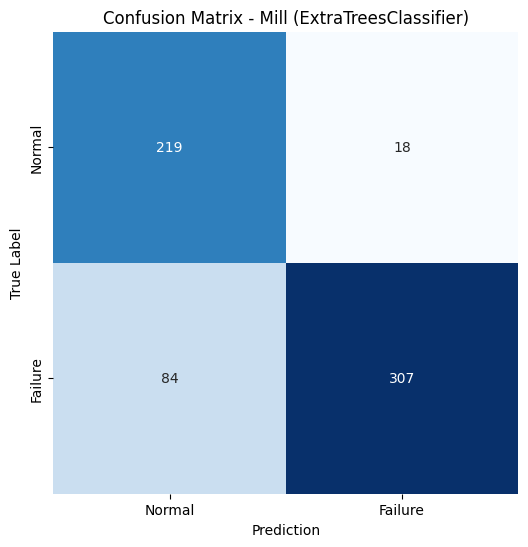

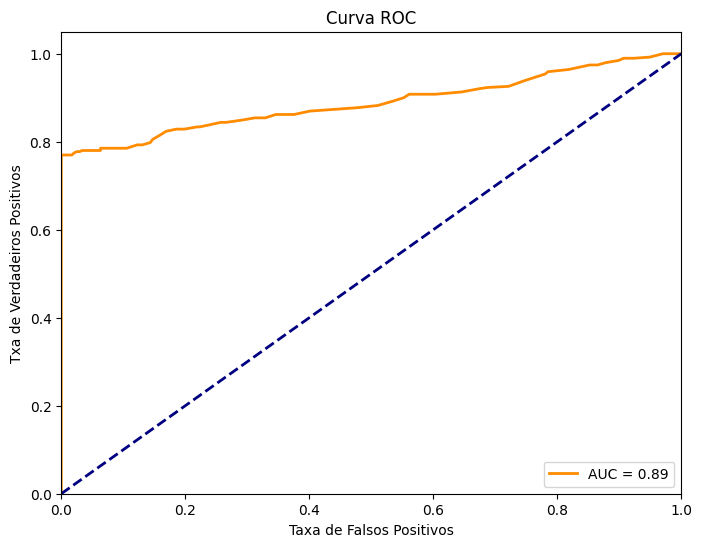

In [60]:
# --- Mill (ExtraTreesClassifier) ---
y_mill_pred = cross_val_predict(pipeline_mill, X_mill, y_mill, cv=cv, method='predict')
y_mill_prob = cross_val_predict(pipeline_mill, X_mill, y_mill, cv=cv, method='predict_proba')[:, 1]

# Confusion Matrix and ROC Curve for Mill
plot_confusion_matrix(y_mill, y_mill_pred, title="Confusion Matrix - Mill (ExtraTreesClassifier)")
plot_roc_curve(y_mill, y_mill_prob, title="Curva ROC")